In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage
import numpy as np
from scipy.misc import imread, imsave, imresize
from scipy import signal

In [7]:
img1=mpimg.imread('im2-0.png')
img2=mpimg.imread('im2-1.png')

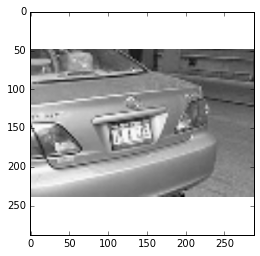

In [8]:
imgplot = plt.imshow(img1)
#imgplot = plt.imshow(img2)

In [9]:
x=imresize(img1, (864, 864))
y=imresize(img2, (864, 864))
y.shape
x= x[150:700,:]
y= y[150:700,:]
y.shape

(550, 864, 4)

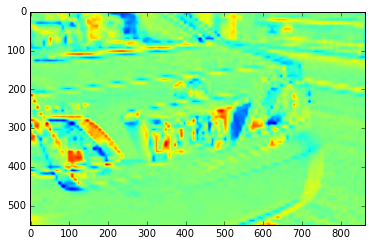

In [17]:
imgplot=plt.imshow(im1_gray-im2_gray)

In [11]:
im1_gray = np.sum(x.astype('float'), axis=2)
im2_gray = np.sum(y.astype('float'), axis=2)

# get rid of the averages, otherwise the results are not good
im1_gray -= np.mean(im1_gray)
im2_gray -= np.mean(im2_gray)

# calculate the correlation image; note the flipping of onw of the images
z=scipy.signal.fftconvolve(im1_gray, im2_gray[::-1,::-1], mode='same')
print(np.unravel_index(np.argmax(z), z.shape))

(283, 393)


In [16]:
def offset(a,b):
    img1=mpimg.imread(a)
    img2=mpimg.imread(b)
    #resize images
    x=imresize(img1, (864, 864))
    y=imresize(img2, (864, 864))
    #crop images
    x= x[150:700,:]
    y= y[150:700,:]
    #convert to grayscale
    im1_gray = np.sum(x.astype('float'), axis=2)
    im2_gray = np.sum(y.astype('float'), axis=2)
    #flatten
    im1_gray -= np.mean(im1_gray)
    im2_gray -= np.mean(im2_gray)
    
    #convolve
    z=scipy.signal.fftconvolve(im1_gray, im2_gray[::-1,::-1], mode='same')
    
    return np.unravel_index(np.argmax(z), z.shape)

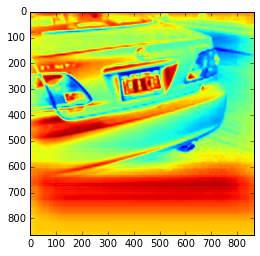

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage
import numpy as np
from scipy.misc import imread, imsave, imresize
from scipy import signal

def offset(a,b):
    img1=mpimg.imread(a)
    img2=mpimg.imread(b)
    #resize images
    x=imresize(img1, (864, 864))
    y=imresize(img2, (864, 864))
    #crop images
    x= x[200:700,:]
    y= y[200:700,:]
    #convert to grayscale
    im1_gray = np.sum(x.astype('float'), axis=2)
    im2_gray = np.sum(y.astype('float'), axis=2)
    #flatten
    im1_gray -= np.mean(im1_gray)
    im2_gray -= np.mean(im2_gray)
    
    #convolve
    z=scipy.signal.fftconvolve(im1_gray, im2_gray[::-1,::-1], mode='same')
    
    return np.unravel_index(np.argmax(z), z.shape)

def shifted(image,offsets):
    img = mpimg.imread(image)
    img = imresize(img, (864, 864))
    #convert to grayscale
    img = np.sum(img.astype('float'), axis=2)
    #flatten
    img -= np.mean(img)
    #shift
    img = scipy.ndimage.interpolation.shift(img,-1*offsets)
    return img
    
    

offsets = np.empty((99,2))
offsets[0]=(0,0)
for i in range(1,99):
  offsets[i] = np.array((432,432))-offset('homework1_data/data/im2-'+str(1)+'.png','homework1_data/data/im2-'+str(i+1)+'.png')

total =mpimg.imread('homework1_data/data/im2-1.png')
total = total*0
total = imresize(total, (864, 864))
total = np.sum(total.astype('float'), axis=2)
total -= np.mean(total)

for i in range(1,99):
    total = total + shifted('homework1_data/data/im2-'+str(i+1)+'.png',offsets[i])
   
imgplot=plt.imshow(total)

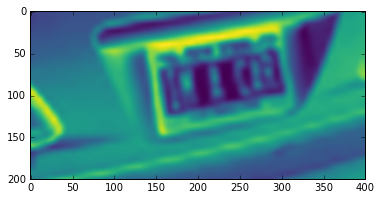

In [63]:
imgplot=plt.imshow(total[200:400,200:600], cmap = plt.get_cmap('viridis_r'))

In [ ]:
import os
cwd = os.getcwd()

In [ ]:
cwd

In [ ]:
img1=mpimg.imread('im2-0.png')
img1 = imresize(img1, (864, 864))
img1 = np.sum(img1.astype('float'), axis=2)
imgplot=plt.imshow(total[250:350,350:450],clim=(0,400))
plt.colorbar()

In [64]:
print(offsets)

[[   0.    0.]
 [  68.  -32.]
 [  13.  -73.]
 [ 190.  -41.]
 [ 183.  -72.]
 [  57. -112.]
 [ 190.   81.]
 [ 125.   -1.]
 [ 190.   41.]
 [  86.  -31.]
 [ 133.  127.]
 [ 128.  -15.]
 [ 165.   66.]
 [ 134.  -31.]
 [  13.  -18.]
 [  76.  -73.]
 [ 134.   33.]
 [  82.   58.]
 [ 149.  -14.]
 [ 238.   42.]
 [ 111.   71.]
 [ 143.   57.]
 [ 174.   70.]
 [  77.   24.]
 [  69.   23.]
 [ 189.  128.]
 [ 144.  -88.]
 [ 138.  -96.]
 [  53.  -38.]
 [ 109.   88.]
 [  77. -128.]
 [ 108.  -56.]
 [  22.   18.]
 [ 191.   73.]
 [  85.  -39.]
 [  32. -103.]
 [  92.  -90.]
 [ 135.    7.]
 [ 146. -175.]
 [ 109.  -28.]
 [  77.  -34.]
 [  98.  -51.]
 [ 110.  -14.]
 [ 129.  -49.]
 [ 182.  110.]
 [ 140.   54.]
 [ 110.   62.]
 [  53.  -67.]
 [  53.  -33.]
 [  60.  -47.]
 [ 134.   21.]
 [ 123.  103.]
 [ 190.   -8.]
 [ 102.   97.]
 [ 125.   -1.]
 [ 204.  -59.]
 [ 190.   25.]
 [ 167.  -14.]
 [  77.   66.]
 [ 167.   32.]
 [  -5.  -17.]
 [ 239.    6.]
 [ 161.   49.]
 [ 142.   84.]
 [ 174.  -32.]
 [ 198.  106.]
 [  85.  -

In [56]:
import matplotlib
from matplotlib import cmap

In [57]:
matplotlib.__version__

'1.5.1'

In [60]:
!conda install -U matplotlib

usage: conda-script.py [-h] [-V] [--debug] command ...
conda-script.py: error: unrecognized arguments: -U


In [61]:
! which conda

'which' is not recognized as an internal or external command,
operable program or batch file.
